# Numerical Derivatives

The goal is to compute the derivative $$\frac{df}{dx} = \lim_{h\to 0} \frac{f(x+h) - f(x)}{h}$$ of a function $f(x)$ where you are given *only* a "black box" that computes the function $f$.

In [2]:
f(x) = sin(3x)

f (generic function with 1 method)

In [3]:
f(3)

0.4121184852417566

In [4]:
sin(9)

0.4121184852417566

In [5]:
function f(x)
    return sin(3x)
end

f (generic function with 1 method)

Now, let's try to *approximately* compute the derivative $f'(2)$, for which the exact answer is $3\cos(6)$.

Exact answer:

In [6]:
3cos(6)

2.880510859951098

## Finite-difference approximation

A simple approximation is the *forward difference*:

$$
f'(x) \approx \frac{f(x+h)-f(x)}{h}
$$
for some small number $h$:

In [7]:
(f(2.0001) - f(2)) / (2.0001 - 2)

2.880636553720977

In [8]:
deriv(f, x, h) = (f(x+h) - f(x))/h

deriv (generic function with 1 method)

In [9]:
deriv(f, 2, 0.0001)

2.880636553727056

In [10]:
1e-3 # same as 10⁻³

0.001

In [11]:
deriv(cos, 1, 1e-4) # should -sin(1)

-0.8414979985216231

In [12]:
-sin(1)

-0.8414709848078965

## How fast does this converge?

How fast does the error go to zero as $h \to 0$?

In [13]:
abs(deriv(f, 2, 1e-4) - 3cos(6))

0.00012569377595816889

In [14]:
abs(deriv(f, 2, 1e-5) - 3cos(6))

1.2573322953013388e-5

In [15]:
0.00012569377595816889 / 1.2573322953013388e-5

9.996862120529915

That it, it looks like the error decreases *proportional to h*:  if we decrease $h$ by a factor of 10, the error decreases by a factor of 10:

In [52]:
abs(deriv(f, 2, 1e-5) - 3cos(6)) / abs(deriv(f, 2, 1e-6) - 3cos(6))

9.996528703829966

But something weird starts to happen when $h$ becomes extremely small: the error actually increases as we decrease $h$!

In [53]:
abs(deriv(f, 2, 1e-10) - 3cos(6)) / abs(deriv(f, 2, 1e-11) - 3cos(6))

0.018400795812165596

### Plotting the convergence rate

This sort of thing is a lot easier to see if we plot it.   To plot, we'll use a plotting package for Julia called [PyPlot](https://github.com/JuliaPy/PyPlot.jl) that calls the full-featured Python Matplotlib package for plotting:

In [18]:
using PyPlot

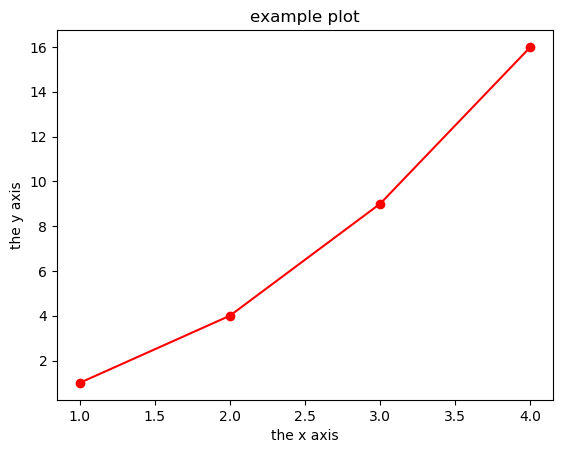

PyObject Text(24,0.5,'the y axis')

In [19]:
plot([1,2,3,4], [1,4,9,16], "ro-")
title("example plot")
xlabel("the x axis")
ylabel("the y axis")

Let's plot the error vs. h:

In [20]:
-16:-1

-16:-1

In [21]:
collect(-16:-1)

16-element Array{Int64,1}:
 -16
 -15
 -14
 -13
 -12
 -11
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1

In [22]:
10.0^-3

0.001

In [23]:
h = 10.0 .^ (-16:-1)

16-element Array{Float64,1}:
 1.0e-16
 1.0e-15
 1.0e-14
 1.0e-13
 1.0e-12
 1.0e-11
 1.0e-10
 1.0e-9 
 1.0e-8 
 1.0e-7 
 1.0e-6 
 1.0e-5 
 0.0001 
 0.001  
 0.01   
 0.1    

In [24]:
h = logspace(-16, -1, 100) # 100 numbers from 1e-16 to 1e-1

100-element Array{Float64,1}:
 1.0e-16    
 1.41747e-16
 2.00923e-16
 2.84804e-16
 4.03702e-16
 5.72237e-16
 8.11131e-16
 1.14976e-15
 1.62975e-15
 2.31013e-15
 3.27455e-15
 4.64159e-15
 6.57933e-15
 ⋮          
 0.00215443 
 0.00305386 
 0.00432876 
 0.00613591 
 0.00869749 
 0.0123285  
 0.0174753  
 0.0247708  
 0.0351119  
 0.0497702  
 0.070548   
 0.1        

In [25]:
[i^2 for i = 1:10] # array "comprehension"

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [26]:
err = [ abs(deriv(f, 2, δ) - 3cos(6)) for δ in h ]

100-element Array{Float64,1}:
 2.88051   
 2.88051   
 2.88051   
 2.9668    
 1.24465   
 0.0297085 
 0.267579  
 0.064616  
 0.253113  
 0.0751118 
 0.286808  
 0.129822  
 0.0287368 
 ⋮         
 0.00268886
 0.0037995 
 0.00536181
 0.00755221
 0.0106085 
 0.014843  
 0.0206485 
 0.0284812 
 0.038784  
 0.0517725 
 0.0669179 
 0.0817831 

In [27]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [28]:
[1,2,3]' # transpose of a real vector

1×3 RowVector{Int64,Array{Int64,1}}:
 1  2  3

"Broadcasting" operations:

In [29]:
atan.([1,2,3]', [3,4,5])

3×3 Array{Float64,2}:
 0.321751  0.588003  0.785398
 0.244979  0.463648  0.643501
 0.197396  0.380506  0.54042 

In [30]:
[1,2,3]' .+ [3,4,5]

3×3 Array{Int64,2}:
 4  5  6
 5  6  7
 6  7  8

Evaluate `deriv` elementwise by `deriv.(f, 2, h)`:

In [31]:
err = abs.(deriv.(f, 2, h) - 3cos(6)) # call abs and deriv elementwise

100-element Array{Float64,1}:
 2.88051   
 2.88051   
 2.88051   
 2.9668    
 1.24465   
 0.0297085 
 0.267579  
 0.064616  
 0.253113  
 0.0751118 
 0.286808  
 0.129822  
 0.0287368 
 ⋮         
 0.00268886
 0.0037995 
 0.00536181
 0.00755221
 0.0106085 
 0.014843  
 0.0206485 
 0.0284812 
 0.038784  
 0.0517725 
 0.0669179 
 0.0817831 

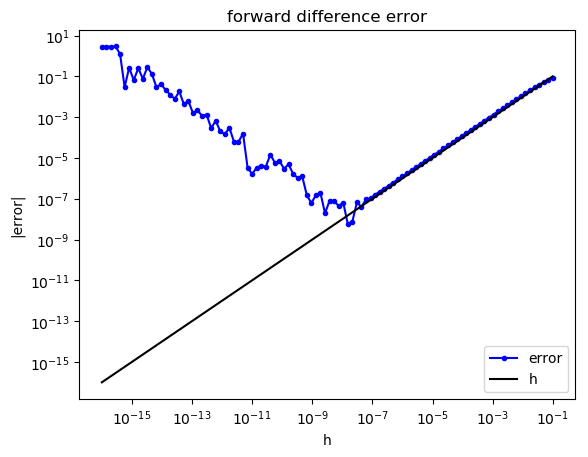

PyObject <matplotlib.legend.Legend object at 0x149e2b908>

In [32]:
loglog(h, err, "b.-")
loglog(h, h, "k-")
title("forward difference error")
xlabel("h")
ylabel("|error|")
legend(["error", "h"])

Two questions:

1. Why does the error initially go down roughly proportional to $h$, as long as $h$ is not too small?

2. Why does the error go *up* when $h$ decreases below about $10^{-8}$???

## Why does the error increase?

Let's try the derivative of $g(x) = 2x$, which should be 2.

In [33]:
g(x) = 2x

g (generic function with 1 method)

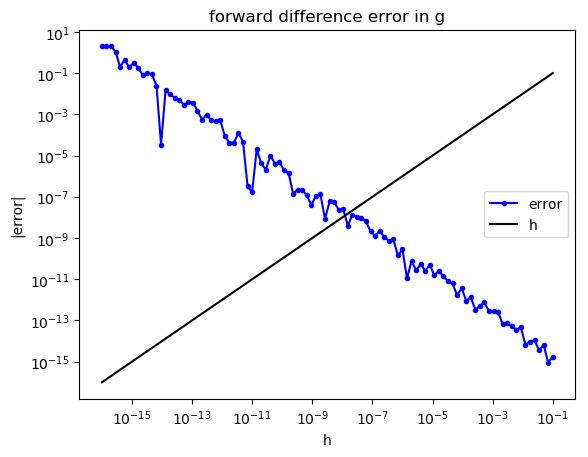

PyObject <matplotlib.legend.Legend object at 0x14e42a320>

In [34]:
loglog(h, abs.(deriv.(g, 2, h) - 2), "b.-")
loglog(h, h, "k-")
title("forward difference error in g")
xlabel("h")
ylabel("|error|")
legend(["error", "h"])

Let's break this into pieces, for $h = 10^{-8}$:

In [35]:
g(2)

4

In [36]:
g(2+1e-8)

4.00000002

In [37]:
g(2+1e-8) - g(2)

1.999999987845058e-8

In [38]:
(g(2+1e-8) - g(2)) / 1e-8

1.999999987845058

Weird.

Let's try it for $h = 1e-100$

In [39]:
g(2)

4

In [40]:
g(2+1e-100)

4.0

Wait, that's not right!  It should be $4 + 2 \times 10^{-100}$!  Let's look at the argument:

In [41]:
1e-100

1.0e-100

In [42]:
2 + 1e-100

2.0

The issue here is **roundoff error**: by default, in most computer languages, real numbers are stored to only about 15 decimal digits.   This corresponds to 64 bits (8 bytes) in memory, which is the most accurate **floating point number** that the computer can do operations on.

We can work with more digits, but they are much slower.

In [43]:
setprecision(BigFloat, 1024) # 1024 binary (base-2 digits)
log10(2)*1024 # this many decimal digits

308.25471555991675

In [44]:
big(2) + BigFloat("1e-100")

2.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000099999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999997

In [45]:
0.1

0.1

In [46]:
big(0.1)

1.000000000000000055511151231257827021181583404541015625000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000e-01

In [47]:
big(0.1) - 1//10

5.551115123125782702118158340454101562499999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999860932883843299914e-18

In [48]:
1//10

1//10

In [49]:
1 + 1e-100

1.0

## Cancellation error:

When we compute $f(x + h) - f(x)$ for very small $h$, we are subtracting two nearly equal numbers, and cancelling most of the significant digits.  What is left over has few or no accurate digits, and smaller h makes this worse.

In differentiating the linear function $g(x) = 2x$, it is easy to see that the forward-difference formula is *exact* regardless of the value of $h$ *if* arithmetic were exact.  So *all* of the error is due to cancellation error, which increases as we decrease $h$.

With our $f(x) = \sin(3x)$, the finite-difference formula is no longer exact in exact arithmetic.  So, cancellation error is not the dominant source of error in that case until $h$ becomes very small.

### Floating-point math is weird

Because the result of every operation is rounded, `+` is no longer associative: $(x+y)+z = x +(y+z)$.

In [50]:
-1 + (1+1e-100)

0.0

In [51]:
(-1 + 1) + 1e-100

1.0e-100

# The other error: finite-difference error

Forgetting about floating-point math, supposing we have infinite precision, how big is the error in our forward-difference approximation?  How fast does it decrease with $h$?

The key thing is to figure out the behavior of $f(x+h)$ for small $h$.  The tool (for smooth functions) is the Taylor series:

$$
f(x+h) = f(x) + f'(x) h + \frac{f''(x)}{2} h^2 + \frac{f'''(x)}{6} h^3 + \cdots
$$

Let's plug this into our forward-difference approximation $\frac{f(x+h)-f(x)}{h}$.  Doing thing, we obtain:

$$
\frac{f(x+h)-f(x)}{h} \approx f'(x) + \frac{f''(x)}{2} h
$$

where we have dropped higher-order terms in $h$ (which are negligible for small $h$).   The $f'(x)$ term is the correct answer — the derivative we want! — and the $\frac{f''(x)}{2} h$ term is the [leading-order term](https://en.wikipedia.org/wiki/Leading-order_term) in the error.  It shows that, for small enough $h$ (but not so small that we hit the the limits of the floating-point precision!) we should expect the forward-difference approximation to have **an error proportional to h**.  This is exactly what we observed in our calculations above!

# Home exercise: Centered differences

Instead of the forward-difference approximation we tried above, try a different approximation, called a "center-difference" approximation:

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

How does this approximation compare for accuracy?  (What happens when you plug the Taylor series in?)